# explore_exercises.ipynb

This is my suggested path forward. You may choose your own adventure for your explore_exercises.ipynb
- If you want a more guided exploration setup, solve the exercises below with seaborn.
- If you want to get more practice with those explore.py functions, use them w/ the Telco dataset

Exercises
Continue in your explore_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

sepal_length x sepal_width
petal_length x petal_width
sepal_area x petal_area
sepal_length x petal_length

4. What are your takeaways? Write them down :)

5. Create a heatmap of each variable layering correlation coefficient on top.

6. Create a scatter matrix visualizing the interaction of each variable.

7. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

8. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

9. What is your takeaway from this statistical testing?

10. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.


In [16]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import acquire
import explore

In [17]:
# acquire data again
df = acquire.get_iris_data()

In [18]:
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,measurement_id
0,1,setosa,5.1,3.5,1.4,0.2,1
1,1,setosa,4.9,3.0,1.4,0.2,2
2,1,setosa,4.7,3.2,1.3,0.2,3
3,1,setosa,4.6,3.1,1.5,0.2,4
4,1,setosa,5.0,3.6,1.4,0.2,5


In [19]:

def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df

In [20]:
df = prep_iris_inline(df)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [21]:
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

def prep_iris(df):

    '''Prepares acquired Iris data for exploration'''
    
    # drop column using .drop(columns=column_name)
    df = df.drop(columns='species_id')
    
    # remame column using .rename(columns={current_column_name : replacement_column_name})
    df = df.rename(columns={'species_name':'species'})
    
    # create dummies dataframe using .get_dummies(column_name,not dropping any of the dummy columns)
    dummy_df = pd.get_dummies(df['species'], drop_first=False)
    
    # join original df with dummies df using .concat([original_df,dummy_df], join along the index)
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [22]:
# df = prep_iris(df)
# df.head()

In [23]:

# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.species)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

In [24]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [25]:
melted = train.melt(id_vars=['species'])
melted.head()

,species,variable,value
0,virginica,sepal_length,6.0
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,5.7
3,versicolor,sepal_length,6.4
4,versicolor,sepal_length,6.2


In [26]:
plt.rc('font', size=14)
plt.rc('figure', figsize=(14, 10))

<AxesSubplot:xlabel='variable', ylabel='value'>

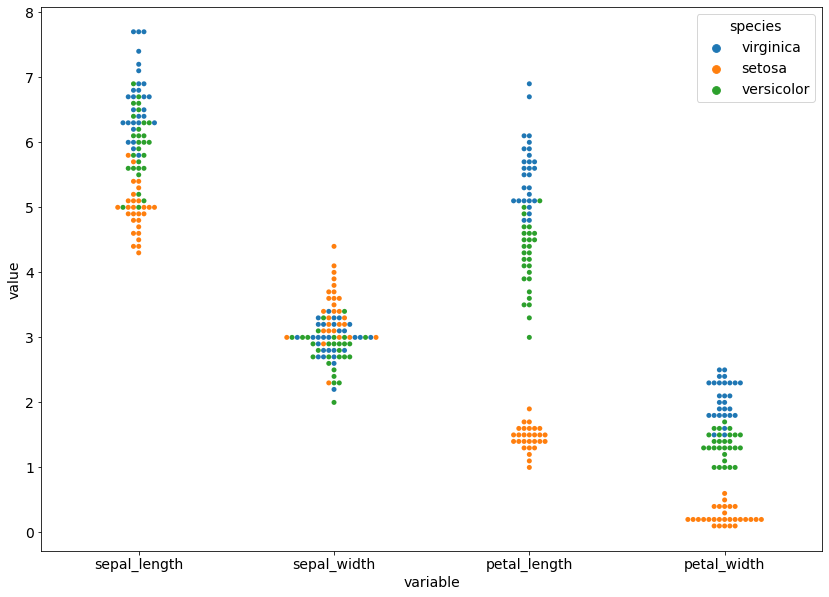

In [27]:
sns.swarmplot(data=melted, x='variable', y='value', hue='species')

- sepal_width is similar amongst all species with an average value around 3
- petal length has the largest difference in value with the smallest being setosa, medium versicolor, largest virginica
- it looks like petal_width and petal_length are separated in the same order
- virginica seems to be the largest species in all the categories

In [28]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [29]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
138,virginica,6.0,3.0,4.8,1.8,18.00,8.64
7,setosa,5.0,3.4,1.5,0.2,17.00,0.30
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
74,versicolor,6.4,2.9,4.3,1.3,18.56,5.59
97,versicolor,6.2,2.9,4.3,1.3,17.98,5.59


In [30]:
train.groupby('species')['sepal_area'].sum()

species
setosa        473.12
versicolor    467.81
virginica     554.13
Name: sepal_area, dtype: float64

In [31]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

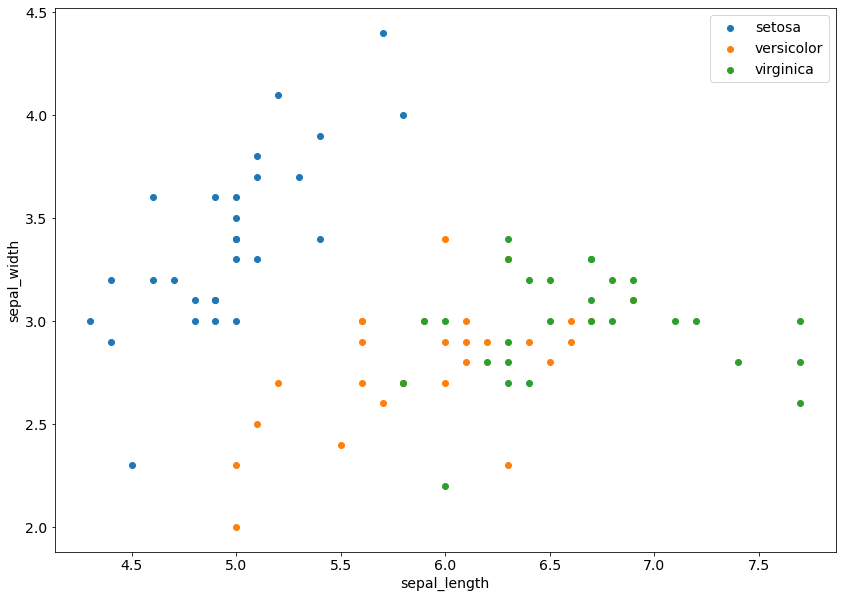

In [32]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        
scatter_species(x,y)

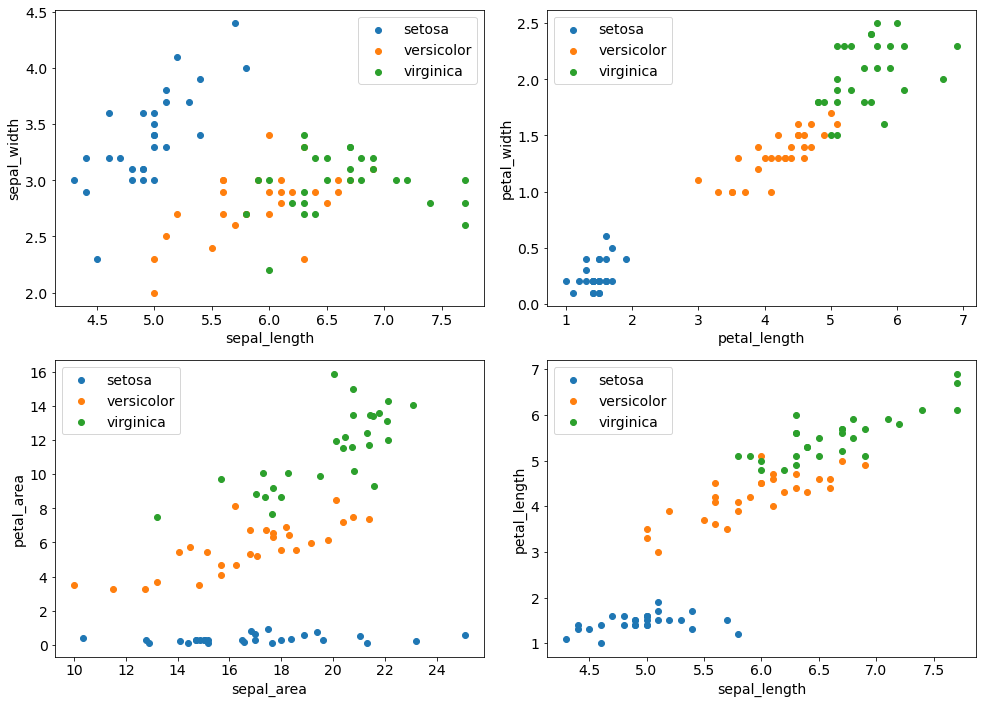

In [33]:
# Create 4 subplots (2 rows x 2 columns) of scatterplots
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

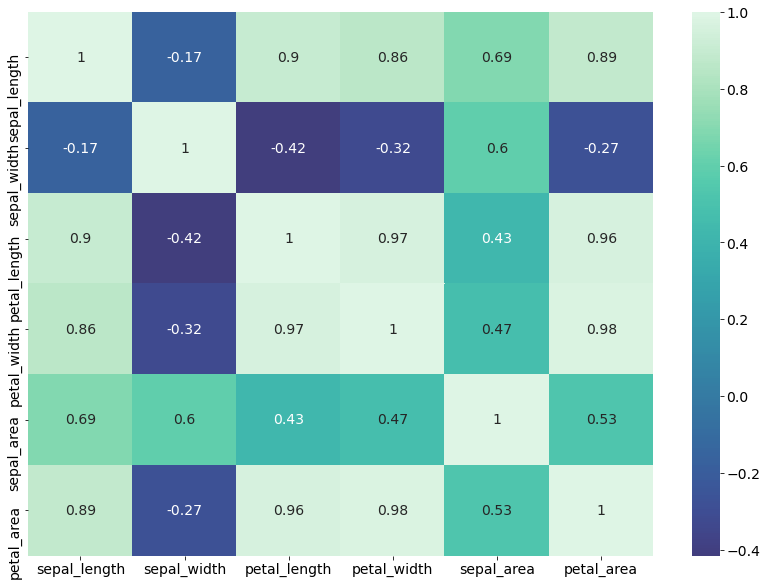

In [34]:
# heatmap 
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

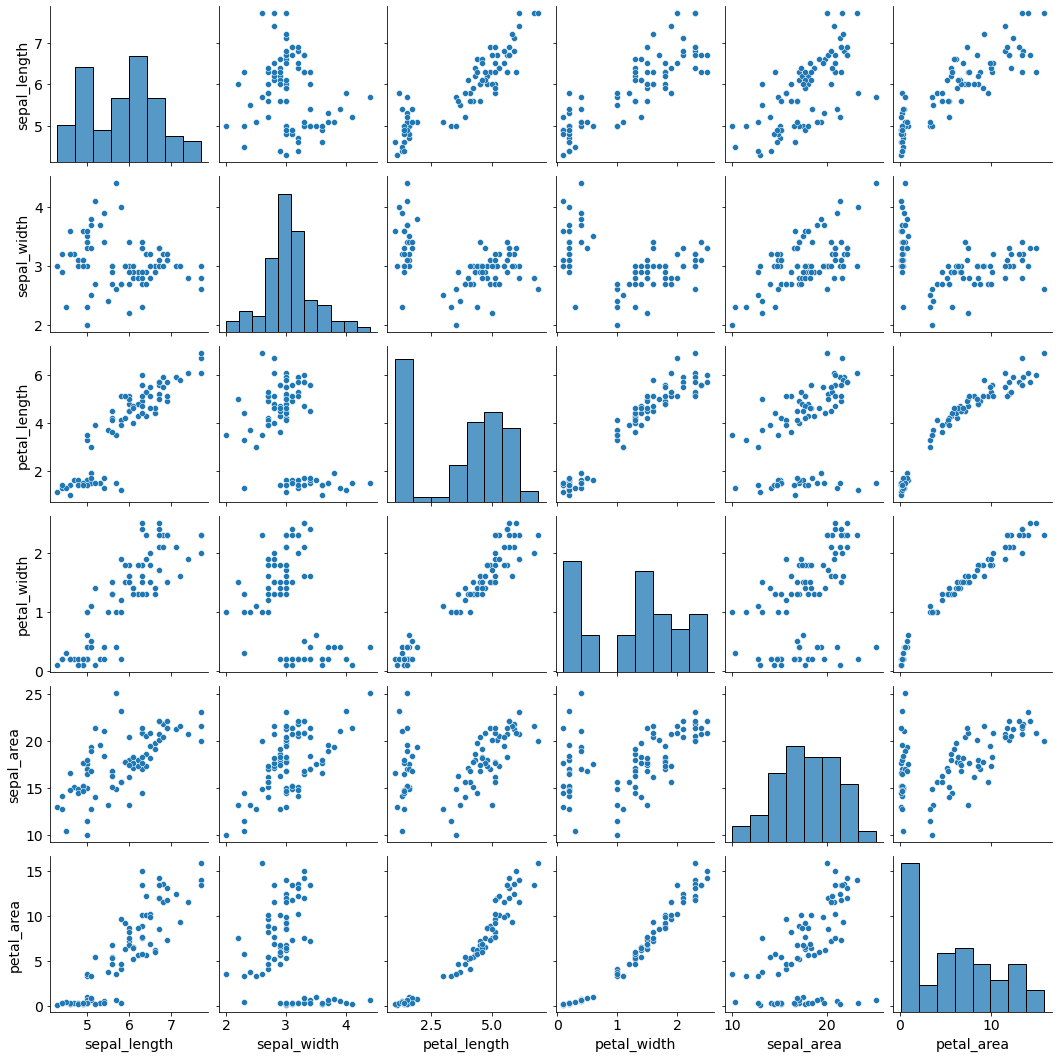

In [35]:
# plotting the train data
sns.pairplot(train)

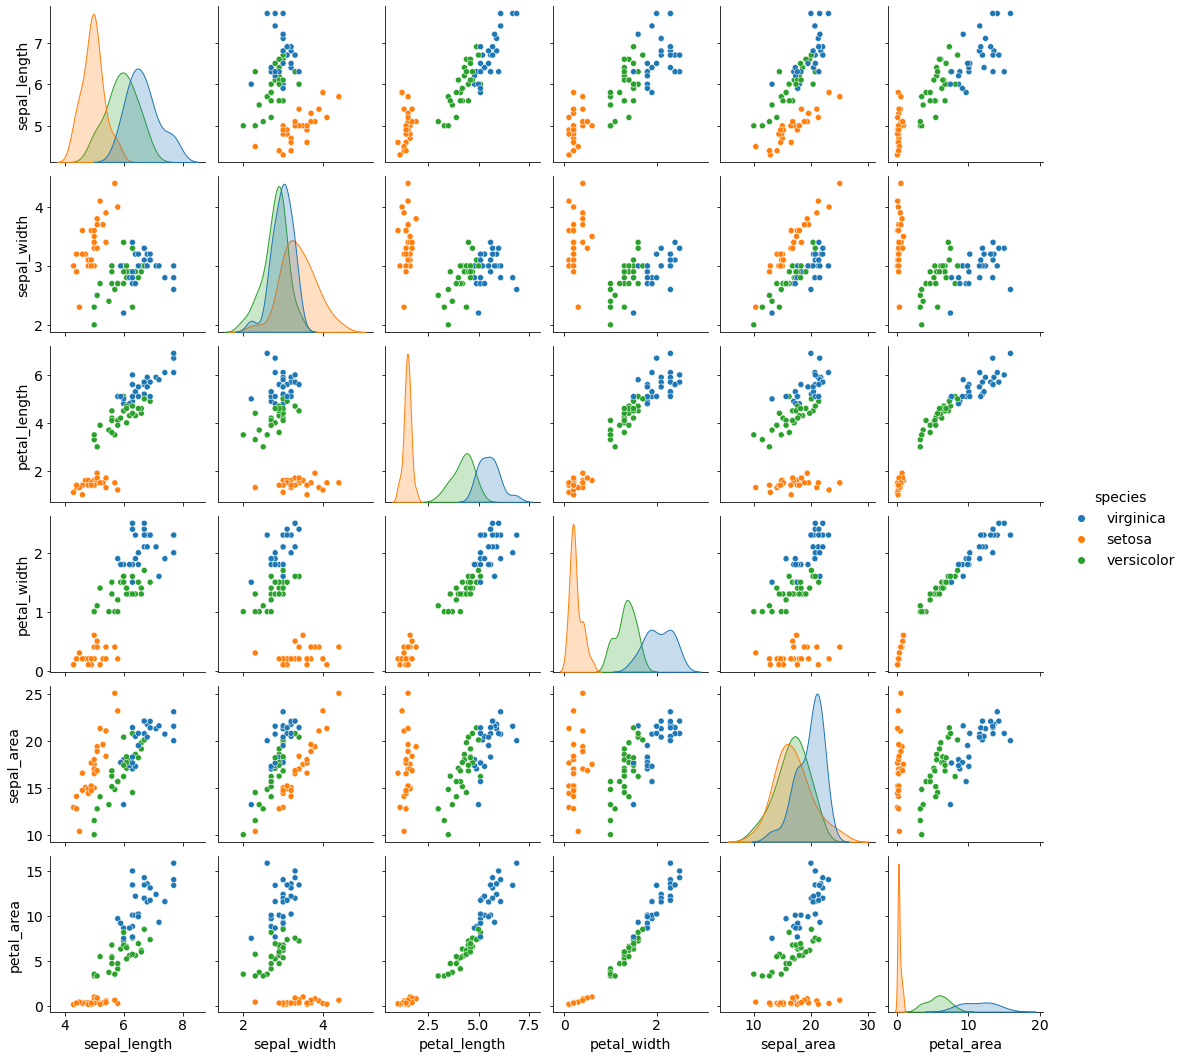

In [37]:
# a better plot
sns.pairplot(train, hue='species')
plt.show()

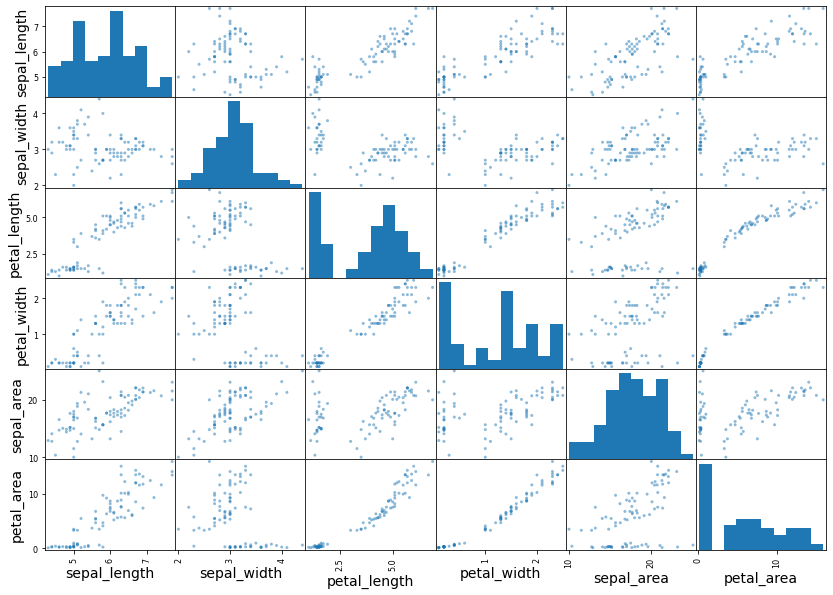

In [36]:

pd.plotting.scatter_matrix(train)
plt.show()